In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud

In [2]:
# Reading the dataset
df = pd.read_csv("spam.csv", encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# checking the shape of the dataset
df.shape

(5572, 5)

#### **There are 5572 rows and 5 columns in the dataset**

## **1.Data cleaning**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#### **Dropping last three columns, because they are of no use**

In [5]:
df.drop(columns = ["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis =1 ,inplace = True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### **Renaming the column names for better understanding**

In [7]:
df.rename(columns ={'v1':'Target','v2':'Text'},inplace = True)

In [8]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### **Mapping ham and spam with 0 and 1 respectively**

In [9]:
df['Target']=df['Target'].map({"ham":0,"spam":1})

In [10]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### **Checking for missing values**

In [11]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

#### **Checking for duplicate values**

In [12]:
df.duplicated().sum()

403

#### **Dropping duplicate values**

In [13]:
df = df.drop_duplicates(keep = 'first')

In [14]:
# checking shape again
df.shape

(5169, 2)

#### **Now there are 5169 rows and 2 columns**

# **2.EDA**

#### **Checking percentage of spam and ham messages**

In [15]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

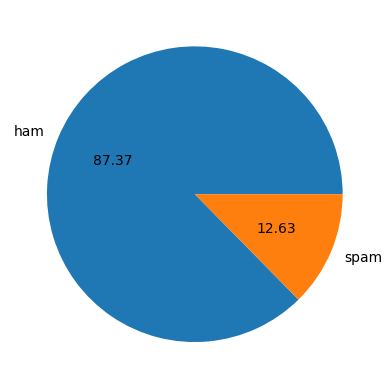

In [16]:
plt.pie(df['Target'].value_counts(),labels = ['ham','spam'],autopct = '%0.2f')
plt.show()

#### **Approximately 87% are ham and 13% are spam**

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
# Storing length of each message in new column

df['num_characters'] = df['Text'].apply(len)

In [19]:
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
# now extracting number of words by nltk
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [22]:
# breaking messages based on number of sentences
df['num_sentences']= df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [23]:
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [24]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


#### **Now checking separately for spam and ham**

In [25]:
# for ham
df[df['Target'] ==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# for spam
df[df['Target'] ==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


#### **Clearly spam messages are bigger in length than ham messages**

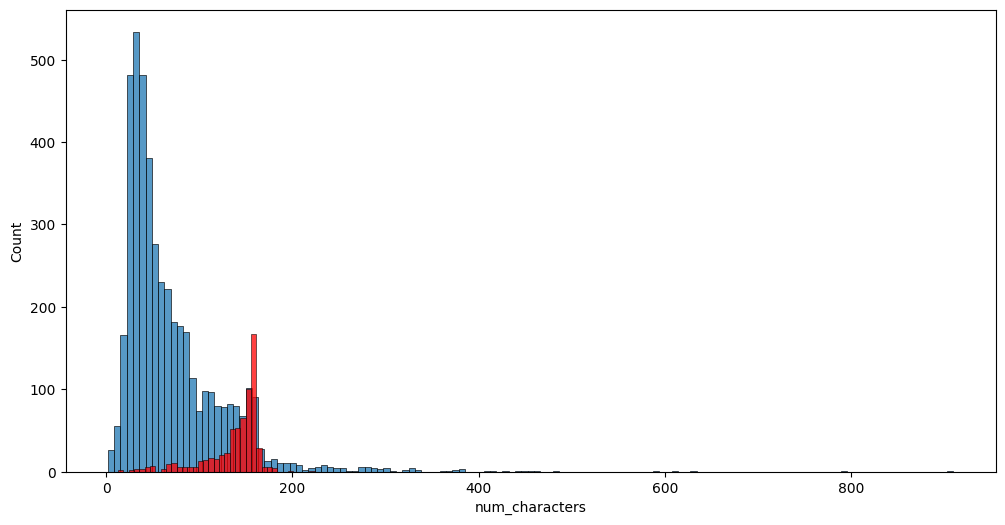

In [27]:
# plotting histogram for number of characters
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_characters'])
sns.histplot(df[df['Target']==1]['num_characters'],color = 'red')
plt.show()

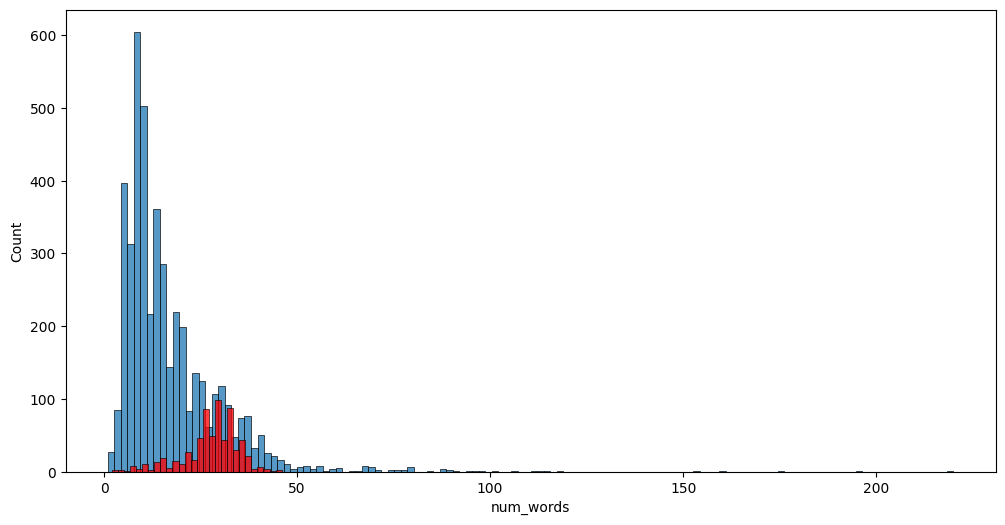

In [28]:
# now checking with number of words
# plotting histogram
plt.figure(figsize=(12,6))
sns.histplot(df[df['Target']==0]['num_words'])
sns.histplot(df[df['Target']==1]['num_words'],color = 'red')
plt.show()

#### **Checking correlation**

<Axes: >

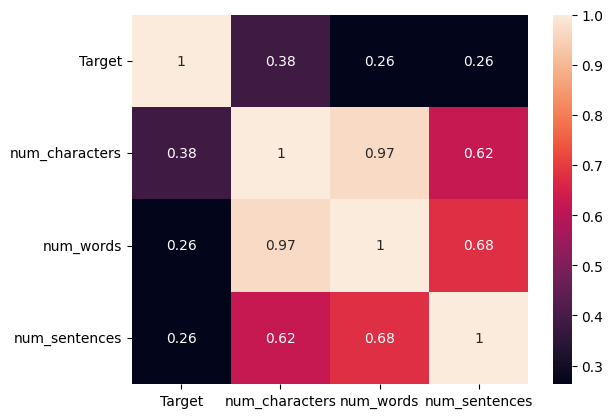

In [29]:
df_numeric = df.select_dtypes(include=['number'])
df_corr = df_numeric.corr()
sns.heatmap(df_corr,annot = True)

### **Data Preprocessing**
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [30]:
def transform_text(text):
    # converting to lower case and tokenizing
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    
    # checking for only alphanumeric words
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    # removing stopwords and punctuation
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    ps = PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [31]:
# applying function on Text column
df['transformed_text'] = df['Text'].apply(transform_text)

In [32]:
df.head()

,Target,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#### **Making wordcloud for spam and ham**

In [33]:
wc = WordCloud(width = 500, height = 500, min_font_size = 10 , background_color ='white')

In [34]:
spam_wc = wc.generate(df[df['Target']==1]['transformed_text'].str.cat(sep = " "))

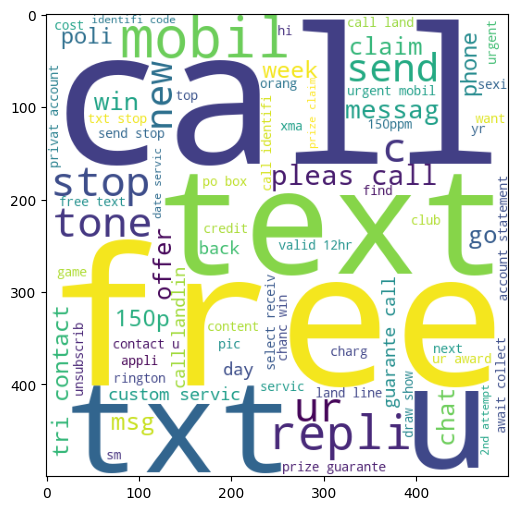

In [35]:
plt.figure(figsize = (15,6))
plt.imshow(spam_wc)

In [36]:
ham_wc = wc.generate(df[df['Target']==0]['transformed_text'].str.cat(sep = " "))

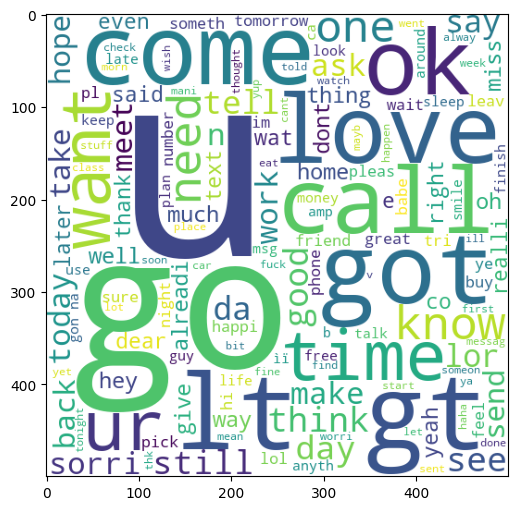

In [37]:
plt.figure(figsize = (15,6))
plt.imshow(ham_wc)

# **Model Building**

In [38]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)

In [39]:
X= tfidf.fit_transform(df['transformed_text']).toarray()
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
X.shape

(5169, 3000)

In [41]:
y = df['Target'].values

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=2)

In [44]:
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [45]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [46]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [47]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [48]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


### **From the above models,mnb model gives 100% precision score which means that no Ham sms is classified as Spam so we take this.**

#### **Further Code is for Showcase**
- #### pickling two files to make an app

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))